#### Project Flow

1. Checking the Null Values in the column and removing columns having more tha 60% of null values.

2. Replace null values with mean or median for numerical data and filling with mode for categorical data.

3. Type casting :
    - Checking for inappropriate data types and convert them 
    - 
    
4. Divide the data into numerical and categorical.

5. Identify , Remove un-necessary columns in the DataFrame.

6. Check for outliers in numerical data and remove or replace them with median.
    - Identifying co relation in  numerical columns and remove columns that are highy co related
    
7. Check categorical columns for value counts and if we have any feature engineering to do.
    - Creating columns for existing columns
    - Domain Knowledge is required
    
8. Identifying either category column belongs to Ordinal or Nominal and convert them accordingly.

9. Perform Standardization on numerical columns if necessary.

10. Assign a target column.

11. Divide the data into train test split.

12. Model Building.
    - KNN
    - Navie Bayes
    - SVM
    
13. Evaluation Metrics.
    - Confusion Matrix
    - Accuracy Score
    - Classification Report
    
14. Basic Analysis [Co-relation analysis].
    - Heat Map

### Importing the libraries

In [1]:
import math
import numpy as np
import pandas as pd

### Reading the CSV file from the directory

In [13]:
bank = pd.read_csv("data.csv")
#bank

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\554886555.py:1: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  bank = pd.read_csv("data.csv")


### Getting the 1st 100000 columns from the dataset

In [14]:
bank_1 = bank.iloc[:100000:]
#bank_1

### Get the number of Unique values in a specific column

In [10]:
bank_1['grade'].value_counts()

B    31276
C    24884
A    18571
D    14598
E     6979
F     2965
G      727
Name: grade, dtype: int64

In [11]:
bank_1['sub_grade'].value_counts()

B3    7194
B4    6844
B2    6078
B5    5592
B1    5568
C1    5534
C2    5368
A5    5289
C3    5113
A4    5001
C4    4626
C5    4243
D1    3401
A3    3336
D2    3321
D3    2873
A2    2760
D4    2667
D5    2336
A1    2185
E2    1682
E1    1672
E3    1338
E4    1198
E5    1089
F1     867
F2     679
F3     579
F4     515
F5     325
G1     246
G2     188
G3     131
G4      97
G5      65
Name: sub_grade, dtype: int64

### Viewing complete data

In [88]:
# Set the display option to show all rows
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now, print your DataFrame
#print(bank)

# Reset the display option to its default value (optional)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

### Basic Analysis

In [68]:
#bank_1.head()

In [69]:
#bank_1.tail()

In [70]:
#bank_1.info()

In [71]:
#bank_1.describe()

### Removing columns having more than 60% of null values

In [15]:
 bank_1.drop(['mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','annual_inc_joint','dti_joint',
            'verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
           'mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','open_rv_24m','max_bal_bc',
           'all_util','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1,inplace=True)

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\3157841454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1.drop(['mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','annual_inc_joint','dti_joint',


### Removing un-necessary columns from the dataset

In [16]:
bank_1.drop(['id','desc','member_id','funded_amnt','emp_title','issue_d','pymnt_plan','title','zip_code','addr_state','earliest_cr_line',
            'initial_list_status','out_prncp_inv','total_pymnt_inv','recoveries','collection_recovery_fee','last_pymnt_d',
            'last_credit_pull_d','policy_code'],axis=1,inplace= True)

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\2146914740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1.drop(['id','desc','member_id','funded_amnt','emp_title','issue_d','pymnt_plan','title','zip_code','addr_state','earliest_cr_line',


In [17]:
bank_1.drop(['funded_amnt_inv','total_rec_late_fee'],axis = 1, inplace = True)

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\2087501430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1.drop(['funded_amnt_inv','total_rec_late_fee'],axis = 1, inplace = True)


In [18]:
bank_1

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,5000.00,861.07,171.62,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,456.46,435.17,119.66,0.0,INDIVIDUAL,0,NaN,NaN,NaN,1
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,2400.00,603.65,649.91,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,10000.00,2209.33,357.48,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0
4,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,2233.10,1009.07,67.79,0.0,INDIVIDUAL,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1400,36 months,18.25,50.79,D,D2,7 years,RENT,34000.0,Verified,...,1065.08,407.65,50.79,0.0,INDIVIDUAL,0,0.0,217.0,1700.0,0
99996,6000,36 months,13.05,202.31,B,B5,6 years,RENT,60000.0,Verified,...,5999.96,1152.78,2297.36,0.0,INDIVIDUAL,0,145.0,30361.0,8500.0,0
99997,2100,36 months,23.50,81.84,F,F1,1 year,RENT,36000.0,Not Verified,...,394.53,341.77,163.68,0.0,INDIVIDUAL,0,0.0,843.0,6600.0,1
99998,33425,60 months,24.89,978.92,F,F4,3 years,MORTGAGE,77000.0,Verified,...,33425.00,3405.73,32921.35,0.0,INDIVIDUAL,0,0.0,351254.0,23000.0,0


### Type Conversions

In [ ]:
#Removing months from 'Term' column to make the data look on a single scale

In [ ]:
# Using lambda Function

In [19]:
bank_1['term'] =  bank_1['term'].apply(lambda x: x.split()[0])

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\2862322090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1['term'] =  bank_1['term'].apply(lambda x: x.split()[0])


In [20]:
# Converting the output column to integer 'int' from 'object'

In [21]:
bank_1['term'] = bank_1['term'].astype(int)

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\1665232209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1['term'] = bank_1['term'].astype(int)


In [123]:
# Converting 'Employment length' column to Integer 

In [ ]:
# Using Replace function to convert

In [22]:
bank_1['emp_length'].replace({'10+ years': 10, '4 years': 4,'8 years': 8,'2 years':2, '1 year':1,'< 1 year':0.5,'7 years':7,'5 years':5,'3 years':3, '9 years':9,'6 years':6}, inplace = True)
bank_1['emp_length']

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\3924590083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1['emp_length'].replace({'10+ years': 10, '4 years': 4,'8 years': 8,'2 years':2, '1 year':1,'< 1 year':0.5,'7 years':7,'5 years':5,'3 years':3, '9 years':9,'6 years':6}, inplace = True)


0        10.0
1         0.5
2        10.0
3        10.0
4         1.0
         ... 
99995     7.0
99996     6.0
99997     1.0
99998     3.0
99999     0.5
Name: emp_length, Length: 100000, dtype: float64

In [ ]:
# Converting the output column to integer 'int' from 'object'

In [ ]:
#bank_1['emp_length'] = bank_1['emp_length'].astype(int)

In [ ]:
#bank_1

### Getting Numerical and Categorical columns seperately for better understanding

In [80]:
# Numerical Columns

In [30]:
bank_num_df = bank_1.select_dtypes(include = 'number')
bank_num_df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000,36,10.65,162.87,10.0,24000.0,27.65,0,1,34.424577,...,5861.071414,5000.00,861.07,171.62,0.0,0,90.417852,140623.016068,30058.138029,0
1,2500,60,15.27,59.83,0.5,30000.0,1.00,0,5,34.424577,...,1008.710000,456.46,435.17,119.66,0.0,0,90.417852,140623.016068,30058.138029,1
2,2400,36,15.96,84.33,10.0,12252.0,8.72,0,2,34.424577,...,3003.653644,2400.00,603.65,649.91,0.0,0,90.417852,140623.016068,30058.138029,0
3,10000,36,13.49,339.31,10.0,49200.0,20.00,0,1,35.000000,...,12226.302210,10000.00,2209.33,357.48,0.0,0,90.417852,140623.016068,30058.138029,0
4,3000,60,12.69,67.79,1.0,80000.0,17.94,0,0,38.000000,...,3242.170000,2233.10,1009.07,67.79,0.0,0,90.417852,140623.016068,30058.138029,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1400,36,18.25,50.79,7.0,34000.0,2.26,2,0,7.000000,...,1472.730000,1065.08,407.65,50.79,0.0,0,0.000000,217.000000,1700.000000,0
99996,6000,36,13.05,202.31,6.0,60000.0,14.18,0,0,34.424577,...,7152.740000,5999.96,1152.78,2297.36,0.0,0,145.000000,30361.000000,8500.000000,0
99997,2100,36,23.50,81.84,1.0,36000.0,4.40,0,2,34.424577,...,999.460000,394.53,341.77,163.68,0.0,0,0.000000,843.000000,6600.000000,1
99998,33425,60,24.89,978.92,3.0,77000.0,21.99,2,1,8.000000,...,36830.730000,33425.00,3405.73,32921.35,0.0,0,0.000000,351254.000000,23000.000000,0


In [ ]:
# Categorical Columns

In [31]:
bank_cat_df = bank_1.select_dtypes(exclude = 'number')
bank_cat_df

,grade,sub_grade,home_ownership,verification_status,purpose,application_type
0,B,B2,RENT,Verified,credit_card,INDIVIDUAL
1,C,C4,RENT,Source Verified,car,INDIVIDUAL
2,C,C5,RENT,Not Verified,small_business,INDIVIDUAL
3,C,C1,RENT,Source Verified,other,INDIVIDUAL
4,B,B5,RENT,Source Verified,other,INDIVIDUAL
...,...,...,...,...,...,...
99995,D,D2,RENT,Verified,debt_consolidation,INDIVIDUAL
99996,B,B5,RENT,Verified,credit_card,INDIVIDUAL
99997,F,F1,RENT,Not Verified,medical,INDIVIDUAL
99998,F,F4,MORTGAGE,Verified,debt_consolidation,INDIVIDUAL


### Filling null values with Mean , Median and Mode

In [ ]:
# Mean

In [24]:
# Replace missing values with mean, median, or mode
def replace_missing_values(data, strategy='mean'):
    if strategy == 'mean':
        return data.fillna(data.mean())
    elif strategy == 'median':
        return data.fillna(data.median())
    elif strategy == 'mode':
        return data.fillna(data.mode().iloc[0])  # Mode may have multiple values

# Columns with missing values
columns_with_missing = ['mths_since_last_delinq','tot_coll_amt','tot_cur_bal','tot_cur_bal','total_rev_hi_lim']

# Choose replacement strategy ('mean', 'median', or 'mode')
replacement_strategy = 'mean'

# Apply the replacement strategy to selected columns
bank_data_filled = bank_1
for column in columns_with_missing:
    bank_data_filled[column] = replace_missing_values(bank_data_filled[column], strategy=replacement_strategy)

# Display the filled dataset
print(bank_data_filled.head())

   loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2        10.0   
1       2500    60     15.27        59.83     C        C4         0.5   
2       2400    36     15.96        84.33     C        C5        10.0   
3      10000    36     13.49       339.31     C        C1        10.0   
4       3000    60     12.69        67.79     B        B5         1.0   

  home_ownership  annual_inc verification_status  ... total_rec_prncp  \
0           RENT     24000.0            Verified  ...         5000.00   
1           RENT     30000.0     Source Verified  ...          456.46   
2           RENT     12252.0        Not Verified  ...         2400.00   
3           RENT     49200.0     Source Verified  ...        10000.00   
4           RENT     80000.0     Source Verified  ...         2233.10   

   total_rec_int  last_pymnt_amnt  collections_12_mths_ex_med  \
0         861.07           171.62                        

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\3840245427.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_filled[column] = replace_missing_values(bank_data_filled[column], strategy=replacement_strategy)


In [ ]:
# Mode

In [25]:
# Replace missing values with mean, median, or mode
def replace_missing_values(data, strategy='mean'):
    if strategy == 'mean':
        return data.fillna(data.mean())
    elif strategy == 'median':
        return data.fillna(data.median())
    elif strategy == 'mode':
        return data.fillna(data.mode().iloc[0])  # Mode may have multiple values

# Columns with missing values
columns_with_missing = ['emp_length','revol_util','collections_12_mths_ex_med']

# Choose replacement strategy ('mean', 'median', or 'mode')
replacement_strategy = 'mode'

# Apply the replacement strategy to selected columns
bank_data_filled = bank_1
for column in columns_with_missing:
    bank_data_filled[column] = replace_missing_values(bank_data_filled[column], strategy=replacement_strategy)

# Display the filled dataset
print(bank_data_filled.head())

   loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0       5000    36     10.65       162.87     B        B2        10.0   
1       2500    60     15.27        59.83     C        C4         0.5   
2       2400    36     15.96        84.33     C        C5        10.0   
3      10000    36     13.49       339.31     C        C1        10.0   
4       3000    60     12.69        67.79     B        B5         1.0   

  home_ownership  annual_inc verification_status  ... total_rec_prncp  \
0           RENT     24000.0            Verified  ...         5000.00   
1           RENT     30000.0     Source Verified  ...          456.46   
2           RENT     12252.0        Not Verified  ...         2400.00   
3           RENT     49200.0     Source Verified  ...        10000.00   
4           RENT     80000.0     Source Verified  ...         2233.10   

   total_rec_int  last_pymnt_amnt  collections_12_mths_ex_med  \
0         861.07           171.62                        

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\3695703208.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_filled[column] = replace_missing_values(bank_data_filled[column], strategy=replacement_strategy)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\3695703208.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_filled[column] = replace_missing_values(bank_data_filled[column], strategy=replacement_strategy)
C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\3695703208.py:19: Se

In [43]:
#bank_data_filled

In [32]:
bank_data_filled.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
default_

### Checking Outliers

In [ ]:
Q1 = bank_data_filled['default_ind'].quantile(0.25)
Q3 = bank_data_filled['default_ind'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (bank_data_filled['default_ind'] < lower_bound) | (bank_data_filled['default_ind'] > upper_bound)
len(outliers)

In [ ]:
# Getting all the numerical columns

In [ ]:
 #df._get_numeric_data()
#bank_data_filled._get_numeric_data()

In [244]:
bank_num_df

,index,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,0,-1.026059,-0.611744,-0.647547,-0.986488,1.187710,-0.894911,1.606751,-0.339308,0.171539,...,-0.798254,-0.694531,-0.677660,-0.581790,-0.053051,-0.045627,NaN,NaN,NaN,-0.361538
1,1,-1.337216,1.634671,0.399290,-1.418858,-1.479139,-0.782311,-1.964585,-0.339308,3.987544,...,-1.372288,-1.343798,-0.839324,-0.591351,-0.053051,-0.045627,NaN,NaN,NaN,2.765957
2,2,-1.349663,-0.611744,0.555636,-1.316053,1.187710,-1.115380,-0.930037,-0.339308,1.125540,...,-1.136286,-1.066068,-0.775372,-0.493779,-0.053051,-0.045627,NaN,NaN,NaN,-0.361538
3,3,-0.403744,-0.611744,-0.004037,-0.246122,1.187710,-0.421993,0.581583,-0.339308,0.171539,...,-0.045247,0.019965,-0.165883,-0.547589,-0.053051,-0.045627,NaN,NaN,NaN,-0.361538
4,4,-1.274985,1.634671,-0.185307,-1.385457,-1.338779,0.156018,0.305525,-0.339308,-0.782462,...,-1.108070,-1.089918,-0.621481,-0.600895,-0.053051,-0.045627,NaN,NaN,NaN,-0.361538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,-1.474125,-0.611744,1.074524,-1.456791,0.345547,-0.707245,-1.795734,2.602628,-0.782462,...,-1.317394,-1.256827,-0.849770,-0.604024,-0.053051,-0.045627,-0.091267,-0.946547,-0.987009,-0.361538
99996,99996,-0.901596,-0.611744,-0.103735,-0.820993,0.064826,-0.219314,-0.198349,-0.339308,-0.782462,...,-0.645449,-0.551637,-0.566931,-0.190631,-0.053051,-0.045627,0.055095,-0.743332,-0.750334,-0.361538
99997,99997,-1.387001,-0.611744,2.264112,-1.326501,-1.338779,-0.669712,-1.508955,-0.339308,1.125540,...,-1.373382,-1.352648,-0.874777,-0.583251,-0.053051,-0.045627,-0.091267,-0.942327,-0.816463,2.765957
99998,99998,2.511801,1.634671,2.579070,2.437769,-0.777337,0.099718,0.848260,2.602628,0.171539,...,2.865457,3.367374,0.288249,5.444507,-0.053051,-0.045627,-0.091267,1.419969,-0.245659,-0.361538


In [ ]:
#bank_data_filled.isnull().sum()

In [ ]:
# Defining a function to check Outliers in each Numerical Column

In [91]:
def outlier_detection(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)

    IQR = q3-q1

    # Lower Boundary
    lb = q1-(1.5 * IQR)

    # upper Boundary
    ub = q3+(1.5 * IQR)

    return len((bank_data_filled.loc[(col < lb) |(col>ub)]))

In [92]:
outlier_detection(bank_data_filled['last_pymnt_amnt'])

10722

In [87]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR     
    upper_bound = Q3 + 1.5 * IQR     
    outliers = column[(column < lower_bound) | (column > upper_bound)]     
    return outliers  # Loop through each column to detect outliers and replace them with the median 
for column in bank_num_df.columns:     
    outliers = detect_outliers(bank_num_df[column])     
    if not outliers.empty:        
        median = bank_num_df[column].median()         
        bank_num_df.loc[outliers.index, column] = median 
        # Print the DataFrame with outliers replaced by median num_df

In [90]:
detect_outliers(bank_data_filled['last_pymnt_amnt'])

31       16966.70
62       13814.81
67       13108.71
75       11046.60
79       10783.73
           ...   
99982    11644.61
99984    14510.02
99985    11834.68
99993    16616.34
99998    32921.35
Name: last_pymnt_amnt, Length: 10722, dtype: float64

In [ ]:
# 

In [271]:
bank_num_df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000,36,10.65,162.87,10.0,24000.0,27.65,0,1,NaN,...,5861.071414,5000.00,861.07,171.62,0.0,0,NaN,NaN,NaN,0
1,2500,60,15.27,59.83,0.5,30000.0,1.00,0,5,NaN,...,1008.710000,456.46,435.17,119.66,0.0,0,NaN,NaN,NaN,1
2,2400,36,15.96,84.33,10.0,12252.0,8.72,0,2,NaN,...,3003.653644,2400.00,603.65,649.91,0.0,0,NaN,NaN,NaN,0
3,10000,36,13.49,339.31,10.0,49200.0,20.00,0,1,35.0,...,12226.302210,10000.00,2209.33,357.48,0.0,0,NaN,NaN,NaN,0
4,3000,60,12.69,67.79,1.0,80000.0,17.94,0,0,38.0,...,3242.170000,2233.10,1009.07,67.79,0.0,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1400,36,18.25,50.79,7.0,34000.0,2.26,2,0,7.0,...,1472.730000,1065.08,407.65,50.79,0.0,0,0.0,217.0,1700.0,0
99996,6000,36,13.05,202.31,6.0,60000.0,14.18,0,0,NaN,...,7152.740000,5999.96,1152.78,2297.36,0.0,0,145.0,30361.0,8500.0,0
99997,2100,36,23.50,81.84,1.0,36000.0,4.40,0,2,NaN,...,999.460000,394.53,341.77,163.68,0.0,0,0.0,843.0,6600.0,1
99998,33425,60,24.89,978.92,3.0,77000.0,21.99,2,1,8.0,...,36830.730000,33425.00,3405.73,32921.35,0.0,0,0.0,351254.0,23000.0,0


In [270]:
bank_cat_df

,grade,sub_grade,home_ownership,verification_status,purpose,application_type
0,B,B2,RENT,Verified,credit_card,INDIVIDUAL
1,C,C4,RENT,Source Verified,car,INDIVIDUAL
2,C,C5,RENT,Not Verified,small_business,INDIVIDUAL
3,C,C1,RENT,Source Verified,other,INDIVIDUAL
4,B,B5,RENT,Source Verified,other,INDIVIDUAL
...,...,...,...,...,...,...
99995,D,D2,RENT,Verified,debt_consolidation,INDIVIDUAL
99996,B,B5,RENT,Verified,credit_card,INDIVIDUAL
99997,F,F1,RENT,Not Verified,medical,INDIVIDUAL
99998,F,F4,MORTGAGE,Verified,debt_consolidation,INDIVIDUAL


### Target Column

In [ ]:
# Setting the target column
In the given dataset the targer column in 'default_ind'
Assigining a variable to the target column

In [33]:
y = bank_num_df['default_ind']

In [34]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: default_ind
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB


In [ ]:
# Dropping the target column from the dataset 

In [35]:
bank_1.drop(['default_ind'],axis = 1 , inplace = True)

C:\Users\rjsek\AppData\Local\Temp\ipykernel_19256\1798654574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_1.drop(['default_ind'],axis = 1 , inplace = True)


In [36]:
bank_1

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,...,5861.071414,5000.00,861.07,171.62,0.0,INDIVIDUAL,0,90.417852,140623.016068,30058.138029
1,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,...,1008.710000,456.46,435.17,119.66,0.0,INDIVIDUAL,0,90.417852,140623.016068,30058.138029
2,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,...,3003.653644,2400.00,603.65,649.91,0.0,INDIVIDUAL,0,90.417852,140623.016068,30058.138029
3,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,...,12226.302210,10000.00,2209.33,357.48,0.0,INDIVIDUAL,0,90.417852,140623.016068,30058.138029
4,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,...,3242.170000,2233.10,1009.07,67.79,0.0,INDIVIDUAL,0,90.417852,140623.016068,30058.138029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1400,36,18.25,50.79,D,D2,7.0,RENT,34000.0,Verified,...,1472.730000,1065.08,407.65,50.79,0.0,INDIVIDUAL,0,0.000000,217.000000,1700.000000
99996,6000,36,13.05,202.31,B,B5,6.0,RENT,60000.0,Verified,...,7152.740000,5999.96,1152.78,2297.36,0.0,INDIVIDUAL,0,145.000000,30361.000000,8500.000000
99997,2100,36,23.50,81.84,F,F1,1.0,RENT,36000.0,Not Verified,...,999.460000,394.53,341.77,163.68,0.0,INDIVIDUAL,0,0.000000,843.000000,6600.000000
99998,33425,60,24.89,978.92,F,F4,3.0,MORTGAGE,77000.0,Verified,...,36830.730000,33425.00,3405.73,32921.35,0.0,INDIVIDUAL,0,0.000000,351254.000000,23000.000000


In [ ]:
# Checking the number of sub categories in a column

In [73]:
bank_cat_df['sub_grade'].unique()

array([ 6.,  4., 10.,  5.,  7., 12., 20., 26.,  0.,  9., 11., 15.,  1.,
        2.,  3., 13., 18.,  8., 19., 17., 23., 16., 14., 27., 22., 29.,
       25., 24., 33., 21., 32., 31., 30., 28., 34.])

In [55]:
len(bank_cat_df['sub_grade'].unique())

35

### Encoding

In [ ]:
# Encoding the Categorical Columns

In [155]:
# Ordinal Encoder

In [156]:
# Converting 'grade' and 'sub_grade' columns

In [37]:
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder(categories=[["A","B","C","D","E","F","G"],
                                  ['C3', 'B3', 'B4', 'C2', 'C4', 'C1', 'B2', 'B5', 'A5', 'B1', 'C5', 'D1',
                                   'A4', 'D2', 'D4', 'A1', 'D3', 'A2', 'A3', 'D5', 'E1', 'E2', 'E3', 'E4',
                                   'E5', 'F1', 'F2', 'F3', 'F5', 'F4', 'G1', 'G2', 'G3', 'G4', 'G5']])

bank_cat_df[["grade","sub_grade"]] = OE.fit_transform(bank_cat_df[["grade","sub_grade"]])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define your mapping for grade and sub_grade
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
sub_grade_mapping = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9,
                     'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
                     'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
                     'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}

# Apply the mappings to your DataFrame
bank_cat_df['grade'] = bank_cat_df['grade'].map(grade_mapping)
bank_cat_df['sub_grade'] = bank_cat_df['sub_grade'].map(sub_grade_mapping)

# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

# Fit and transform the encoded columns (if needed)
# encoded_data = OE.fit_transform(bank_cat_df[['grade', 'sub_grade']])

# You can now use encoded_data as the transformed data if you need it

In [162]:
# Nominal Encoder

In [163]:
# Converting the remaining categorical columns

In [ ]:
# Using One - Hot Encoder

In [38]:
one_encoder = ["home_ownership","verification_status","purpose","application_type"]
bank_cat_df = pd.get_dummies(bank_cat_df, columns=one_encoder )

### Normalization

In [ ]:
# Normalizing the numerical data to bring down the entire data to a same scale 

In [ ]:
# Standard Scaler

In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
bank_num_df = pd.DataFrame(ss.fit_transform(bank_num_df),columns=bank_num_df.columns)

In [40]:
bank_num_df.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
emp_length                    0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
default_ind                   0
dtype: int64

### Concatenation

In [ ]:
# Resetting indexes before concatenating the Numerical and categorical data to preserve the indexes

In [41]:
bank_cat_df = bank_cat_df.reset_index()
bank_num_df = bank_num_df.reset_index()

In [ ]:
# Concatenating the Numerical and Categorical data

In [42]:
bank_2 = pd.concat([bank_cat_df,bank_num_df],axis=1)

In [43]:
bank_2

,index,grade,sub_grade,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,...,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,0,1.0,6.0,0,0,0,0,1,0,0,...,-0.798254,-0.694531,-0.677660,-0.581790,-0.053037,-0.045627,-1.847138e-17,0.000000,0.000000,-0.361538
1,1,2.0,4.0,0,0,0,0,1,0,1,...,-1.372288,-1.343798,-0.839324,-0.591351,-0.053037,-0.045627,-1.847138e-17,0.000000,0.000000,2.765957
2,2,2.0,10.0,0,0,0,0,1,1,0,...,-1.136286,-1.066068,-0.775372,-0.493779,-0.053037,-0.045627,-1.847138e-17,0.000000,0.000000,-0.361538
3,3,2.0,5.0,0,0,0,0,1,0,1,...,-0.045247,0.019965,-0.165883,-0.547589,-0.053037,-0.045627,-1.847138e-17,0.000000,0.000000,-0.361538
4,4,1.0,7.0,0,0,0,0,1,0,1,...,-1.108070,-1.089918,-0.621481,-0.600895,-0.053037,-0.045627,-1.847138e-17,0.000000,0.000000,-0.361538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,3.0,13.0,0,0,0,0,1,0,0,...,-1.317394,-1.256827,-0.849770,-0.604024,-0.053037,-0.045627,-1.175258e-01,-1.218883,-1.270986,-0.361538
99996,99996,1.0,7.0,0,0,0,0,1,0,0,...,-0.645449,-0.551637,-0.566931,-0.190631,-0.053037,-0.045627,7.094631e-02,-0.957199,-0.966216,-0.361538
99997,99997,5.0,25.0,0,0,0,0,1,1,0,...,-1.373382,-1.352648,-0.874777,-0.583251,-0.053037,-0.045627,-1.175258e-01,-1.213449,-1.051372,2.765957
99998,99998,5.0,29.0,1,0,0,0,0,0,0,...,2.865457,3.367374,0.288249,5.444507,-0.053037,-0.045627,-1.175258e-01,1.828515,-0.316339,-0.361538


In [ ]:
# Assigning the output data to a variable 'X' for train and test split

In [44]:
X = bank_2 

In [45]:
X.isnull().sum()

index                                  0
grade                                  0
sub_grade                              0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_car                            0
purpose_credit_card                    0
purpose_debt_consolidation             0
purpose_educational                    0
purpose_home_improvement               0
purpose_house                          0
purpose_major_purchase                 0
purpose_medical                        0
purpose_moving                         0
purpose_other                          0
purpose_renewable_energy               0
purpose_small_business                 0
purpose_vacation                       0
purpose_wedding 

### Train Test Split

In [ ]:
# Train_Test Split the data

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train, X_test, y_train, y_test

(       index  grade  sub_grade  home_ownership_MORTGAGE  home_ownership_NONE  \
 75220  75220    2.0       10.0                        1                    0   
 48955  48955    1.0        7.0                        1                    0   
 44966  44966    1.0        2.0                        1                    0   
 13568  13568    0.0       17.0                        1                    0   
 92727  92727    3.0       16.0                        1                    0   
 ...      ...    ...        ...                      ...                  ...   
 6265    6265    1.0        6.0                        0                    0   
 54886  54886    3.0       14.0                        0                    0   
 76820  76820    2.0        3.0                        0                    0   
 860      860    1.0        7.0                        1                    0   
 15795  15795    4.0       20.0                        0                    0   
 
        home_ownership_OTH

### Model Building

In [ ]:
# K - NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_predicted = knn.predict(X_test)

In [ ]:
# Checking the Classification Report and Accuracy Score

In [50]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     17625
           1       0.33      0.00      0.00      2375

    accuracy                           0.88     20000
   macro avg       0.61      0.50      0.47     20000
weighted avg       0.82      0.88      0.83     20000



In [ ]:
# Checking the Accuracy score in percentage

In [51]:
accuracy_score(y_test,y_predicted)*100

88.115

In [ ]:
# Checking for Errors - Error Report

In [65]:
error = []
for i in range(2,50):
      from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
error.append(np.mean(y_predicted!=y_test))

In [70]:
print(error)

[0.11875]


In [ ]:
# Visualising the Error Report

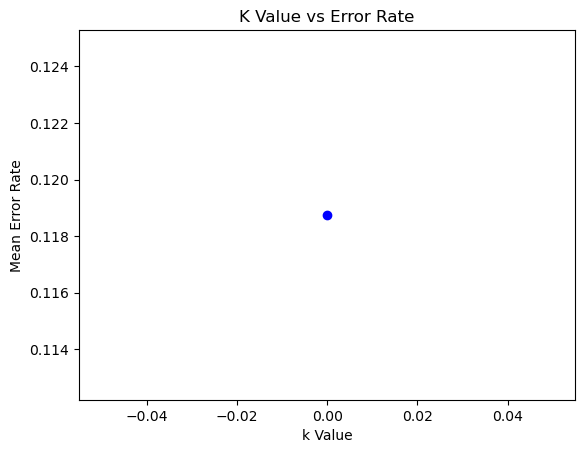

In [66]:
import matplotlib.pyplot as plt
plt.plot(error,color='blue',marker='o')
plt.xlabel('k Value')
plt.ylabel('Mean Error Rate')
plt.title('K Value vs Error Rate')
plt.show()

In [ ]:
# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
clf = GaussianNB(var_smoothing = 0.0001) # Hyper Parameter
clf.fit(X_train , y_train)

GaussianNB(var_smoothing=0.0001)

In [61]:
test_prediction = clf.predict(X_test)

In [62]:
print("Validation Accuracy : " , accuracy_score(y_test , test_prediction))

Validation Accuracy :  0.88125


In [63]:
accuracy_score(y_test,test_prediction)*100

88.125

In [ ]:
END

In [ ]:
# SVC - [Not Working]

In [58]:
from sklearn.svm import SVC # Support vector Classifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [ ]:
rbf_svm = SVC(kernel = 'rbf' , C = 100 , gamma = 0.03 , random_state = 10)

# Train the classifier

rbf_svm.fit(X_train , y_train)


test_predictions = rbf_svm.predict(X_test)
train_predictions = rbf_svm.predict(X_train)

print(confusion_matrix(y_test , y_predictions))

print("Train Accuracy : " , accuracy_score(y_train , train_prediction) * 100)
print("Test Accuracy : " , accuracy_score(y_test , test_predictions) * 100)